In [1]:
from collections import defaultdict
import heapq


def create_spanning_tree(graph, starting_vertex):
    mst = defaultdict(set)
    visited = set([starting_vertex])
    edges = [
        (cost, starting_vertex, to)
        for to, cost in graph[starting_vertex]
    ]
    heapq.heapify(edges)

    while edges:
        cost, frm, to = heapq.heappop(edges)
        
        if to not in visited:
            visited.add(to)
            mst[frm].add((to, cost))
            for to_next, cost in graph[to]: 
                if to_next not in visited:
                    heapq.heappush(edges, (cost, to, to_next))

    return dict(mst)

example_graph = {
    'A': {('B', 7), ('D', 5)},
    'B': {('A', 7), ('C', 8), ('D', 9), ('E', 7)},
    'C': {('B', 8), ('E', 5)},
    'D': {('A', 5), ('B', 9), ('E', 15), ('F', 6)},
    'E': {('B', 7), ('C', 5), ('D', 15), ('F', 8), ('G', 9)},
    'F': {('D', 6), ('E', 8), ('G', 11)},
    'G': {('E', 9), ('F', 11)},
}
# example_graph = {
#     'A': {'B': 7, 'D': 5},
#     'B': {'A': 7, 'C': 8, 'D': 9, 'E': 7},
#     'C': {'B': 8, 'E': 5},
#     'D': {'A': 5, 'B': 9, 'E': 15, 'F': 6},
#     'E': {'B': 7, 'C': 5, 'D': 15, 'F': 8, 'G': 9},
#     'F': {'D': 6, 'E': 8, 'G': 11},
#     'G': {'E': 9, 'F': 11},
# }

result = create_spanning_tree(example_graph, 'A')
print(result)

{'A': {('B', 7), ('D', 5)}, 'D': {('F', 6)}, 'B': {('E', 7)}, 'E': {('G', 9), ('C', 5)}}


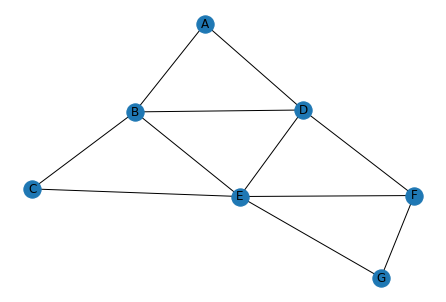

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
def drawMST(graph):
    P = nx.Graph()
    P.add_nodes_from(graph.keys())
    edges = []
    for keys, values in graph.items():
        for value, cost in values:
            edges.append((keys, value))
    P.add_edges_from(edges)
    nx.draw(P, with_labels = True)
drawMST(example_graph)


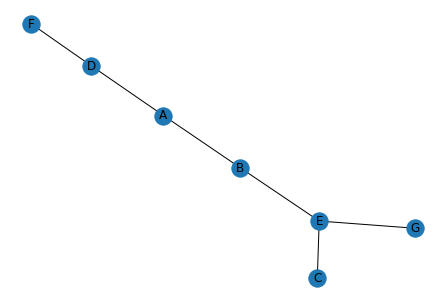

In [3]:
drawMST(result)

#### Ứ ng dụng cụ thể

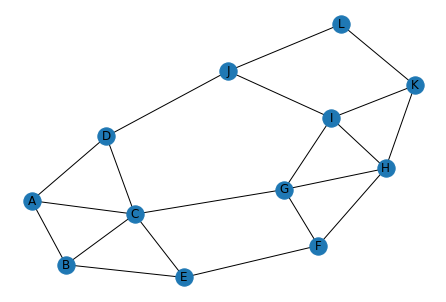

In [4]:
g = {
    "A": {('B', 6), ('C', 6), ('D', 6)},
    "B": {('A', 6), ('C', 1), ('E', 7)},
    "C": {('A', 6), ('D', 2), ('G', 2)},
    "D": {('A', 6), ('C', 2), ('J', 18)},
    "E": {('B', 2), ('C', 7), ('F', 4)},
    "F": {('E', 4), ('G', 11), ('H', 10)},
    "G": {('C', 2), ('F', 11), ('H', 22), ('I', 2)},
    "H": {('F', 10), ('G', 22), ('I', 12), ('K', 25)},
    "I": {('G', 2), ('H', 12), ('J', 1)},
    "J": {('D', 18), ('I', 1), ('L', 8)},
    "K": {('H', 25), ('I', 16), ('L', 3)},
    "L": {('J', 8), ('K', 3)}
    }
mst = create_spanning_tree(g, 'A')
drawMST(g)

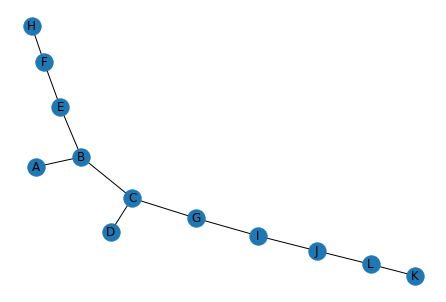

In [5]:
mst = create_spanning_tree(g, 'A')

drawMST(mst)